## Imports & pattern generation

In [ ]:

from gcode import *
from generate_results import generate_pa_results_for_pattern
from pa import *
from pattern_info import PatternInfo
from reg import HeightMapRegressor
from visualization import generate_3d_height_map, generate_color_map

import numpy as np


import torch
import torch.nn as nn
import torch.nn.functional as F

pattern = PatternInfo(
    0, 0.06,
    30, 30,
    10,
    30, 4
)






KeyboardInterrupt: 

## print pattern

In [4]:
send_gcode("LASER_OFF")
send_gcode(PRINT_START)
send_gcode("PURGE_LINE")
gcode= generate_pa_tune_gcode(pattern)
print(gcode)
send_gcode(gcode)
send_gcode("G90;")
send_gcode(f"G1 X{FINISHED_X} Y{FINISHED_Y} F30000")
wait_until_printer_at_location(FINISHED_X, FINISHED_Y)
send_gcode("M104 S0; let the hotend cool")


        G21 ; Millimeter units
        G90 ; Absolute XYZ
        M83 ; Relative E
        SET_VELOCITY_LIMIT ACCEL=3000 ACCEL_TO_DECEL=1500
        G92 E0 ;
        M106 S0 ; set fan speed to 0

        G1 X60.4 Y25.6 Z10 F30000 ; move to start position
        G1 Z0.25 F300 ; move to layer height
        G91 ; switch to relative movements

        ; Print a bounding box to aid with removal and prime the extruder.
        G1 E0.8
        G1 Y44.8 E2.0562752 F2000;
        G1 X-30.8 E1.4136892 F2000;
        G1 Y-44.8 E2.0562752 F2000;
        G1 X30.8 E1.4136892 F2000;
        G1 X-0.4 Y0.4
        ; second bounding box loop
        G1 Y44 E2.019556 F2000;
        G1 X-30 E1.37697 F2000;
        G1 Y-44 E2.019556 F2000;
        G1 X30 E1.37697 F2000;

        G1 Z0.75 E-0.4 F300; retract and prepare to hop to first line location.
    
            SET_PRESSURE_ADVANCE ADVANCE=0.0 ; set Pressure Advance
            M117 Testing Pressure Advance at: 0.0
            G1 X-30 Y4 F30000    

{'jsonrpc': '2.0', 'result': 'ok', 'id': 3841589}

## scan and pre-process

In [5]:
pa_scans= []
if(has_homed()==False):
    send_gcode("G28")

send_gcode("LASER_ON")

scan=generate_pa_results_for_pattern(pattern)


ffmpeg version n7.1.1 Copyright (c) 2000-2025 the FFmpeg developers
  built with gcc 15.1.1 (GCC) 20250425
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-frei0r --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libdav1d --enable-libdrm --enable-libdvdnav --enable-libdvdread --enable-libfreetype --enable-libfribidi --enable-libglslang --enable-libgsm --enable-libharfbuzz --enable-libiec61883 --enable-libjack --enable-libjxl --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libplacebo --enable-libpulse --enable-librav1e --enable-librsvg --enable-librubberband --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enab

{'jsonrpc': '2.0', 'result': 'ok', 'id': 684260}


Input #0, mjpeg, from 'http://192.168.3.74/webcam/?action=stream':
  Duration: N/A, bitrate: N/A
  Stream #0:0: Video: mjpeg (Baseline), yuvj420p(pc, bt470bg/unknown/unknown), 1920x1080 [SAR 1:1 DAR 16:9], 30 fps, 30 tbr, 1200k tbn
Stream mapping:
  Stream #0:0 -> #0:0 (mjpeg (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x55e081bf0580] using SAR=1/1
[libx264 @ 0x55e081bf0580] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x55e081bf0580] profile High, level 4.0, 4:2:0, 8-bit
[libx264 @ 0x55e081bf0580] 264 - core 164 r3108 31e19f9 - H.264/MPEG-4 AVC codec - Copyleft 2003-2023 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=30 lookahead_threads=5 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bfram

{'jsonrpc': '2.0', 'result': 'ok', 'id': 7288485}


Input #0, mjpeg, from 'http://192.168.3.74/webcam/?action=stream':
  Duration: N/A, bitrate: N/A
  Stream #0:0: Video: mjpeg (Baseline), yuvj420p(pc, bt470bg/unknown/unknown), 1920x1080 [SAR 1:1 DAR 16:9], 30 fps, 30 tbr, 1200k tbn
Stream mapping:
  Stream #0:0 -> #0:0 (mjpeg (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x564e8bae5580] using SAR=1/1
[libx264 @ 0x564e8bae5580] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x564e8bae5580] profile High, level 4.0, 4:2:0, 8-bit
[libx264 @ 0x564e8bae5580] 264 - core 164 r3108 31e19f9 - H.264/MPEG-4 AVC codec - Copyleft 2003-2023 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=30 lookahead_threads=5 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bfram

{'jsonrpc': '2.0', 'result': 'ok', 'id': 8881709}


Input #0, mjpeg, from 'http://192.168.3.74/webcam/?action=stream':
  Duration: N/A, bitrate: N/A
  Stream #0:0: Video: mjpeg (Baseline), yuvj420p(pc, bt470bg/unknown/unknown), 1920x1080 [SAR 1:1 DAR 16:9], 30 fps, 30 tbr, 1200k tbn
Stream mapping:
  Stream #0:0 -> #0:0 (mjpeg (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x55be94d5b580] using SAR=1/1
[libx264 @ 0x55be94d5b580] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x55be94d5b580] profile High, level 4.0, 4:2:0, 8-bit
[libx264 @ 0x55be94d5b580] 264 - core 164 r3108 31e19f9 - H.264/MPEG-4 AVC codec - Copyleft 2003-2023 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=30 lookahead_threads=5 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bfram

{'jsonrpc': '2.0', 'result': 'ok', 'id': 8454772}


Input #0, mjpeg, from 'http://192.168.3.74/webcam/?action=stream':
  Duration: N/A, bitrate: N/A
  Stream #0:0: Video: mjpeg (Baseline), yuvj420p(pc, bt470bg/unknown/unknown), 1920x1080 [SAR 1:1 DAR 16:9], 30 fps, 30 tbr, 1200k tbn
Stream mapping:
  Stream #0:0 -> #0:0 (mjpeg (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x556ce224f580] using SAR=1/1
[libx264 @ 0x556ce224f580] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x556ce224f580] profile High, level 4.0, 4:2:0, 8-bit
[libx264 @ 0x556ce224f580] 264 - core 164 r3108 31e19f9 - H.264/MPEG-4 AVC codec - Copyleft 2003-2023 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=30 lookahead_threads=5 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bfram

{'jsonrpc': '2.0', 'result': 'ok', 'id': 8175179}


Input #0, mjpeg, from 'http://192.168.3.74/webcam/?action=stream':
  Duration: N/A, bitrate: N/A
  Stream #0:0: Video: mjpeg (Baseline), yuvj420p(pc, bt470bg/unknown/unknown), 1920x1080 [SAR 1:1 DAR 16:9], 30 fps, 30 tbr, 1200k tbn
Stream mapping:
  Stream #0:0 -> #0:0 (mjpeg (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x55f1ce32f580] using SAR=1/1
[libx264 @ 0x55f1ce32f580] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x55f1ce32f580] profile High, level 4.0, 4:2:0, 8-bit
[libx264 @ 0x55f1ce32f580] 264 - core 164 r3108 31e19f9 - H.264/MPEG-4 AVC codec - Copyleft 2003-2023 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=30 lookahead_threads=5 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bfram

{'jsonrpc': '2.0', 'result': 'ok', 'id': 4709029}


Input #0, mjpeg, from 'http://192.168.3.74/webcam/?action=stream':
  Duration: N/A, bitrate: N/A
  Stream #0:0: Video: mjpeg (Baseline), yuvj420p(pc, bt470bg/unknown/unknown), 1920x1080 [SAR 1:1 DAR 16:9], 30 fps, 30 tbr, 1200k tbn
Stream mapping:
  Stream #0:0 -> #0:0 (mjpeg (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x5579d0395580] using SAR=1/1
[libx264 @ 0x5579d0395580] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x5579d0395580] profile High, level 4.0, 4:2:0, 8-bit
[libx264 @ 0x5579d0395580] 264 - core 164 r3108 31e19f9 - H.264/MPEG-4 AVC codec - Copyleft 2003-2023 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=30 lookahead_threads=5 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bfram

{'jsonrpc': '2.0', 'result': 'ok', 'id': 2070819}


Input #0, mjpeg, from 'http://192.168.3.74/webcam/?action=stream':
  Duration: N/A, bitrate: N/A
  Stream #0:0: Video: mjpeg (Baseline), yuvj420p(pc, bt470bg/unknown/unknown), 1920x1080 [SAR 1:1 DAR 16:9], 30 fps, 30 tbr, 1200k tbn
Stream mapping:
  Stream #0:0 -> #0:0 (mjpeg (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[in#0/mjpeg @ 0x56402cc183c0] Error during demuxing: Immediate exit requested
[libx264 @ 0x56402cc2c580] using SAR=1/1
[libx264 @ 0x56402cc2c580] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x56402cc2c580] profile High, level 4.0, 4:2:0, 8-bit
[libx264 @ 0x56402cc2c580] 264 - core 164 r3108 31e19f9 - H.264/MPEG-4 AVC codec - Copyleft 2003-2023 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=30 lookahead_threads=5 sliced_th

{'jsonrpc': '2.0', 'result': 'ok', 'id': 967593}


Input #0, mjpeg, from 'http://192.168.3.74/webcam/?action=stream':
  Duration: N/A, bitrate: N/A
  Stream #0:0: Video: mjpeg (Baseline), yuvj420p(pc, bt470bg/unknown/unknown), 1920x1080 [SAR 1:1 DAR 16:9], 30 fps, 30 tbr, 1200k tbn
Stream mapping:
  Stream #0:0 -> #0:0 (mjpeg (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x55c1859c1580] using SAR=1/1
[libx264 @ 0x55c1859c1580] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x55c1859c1580] profile High, level 4.0, 4:2:0, 8-bit
[libx264 @ 0x55c1859c1580] 264 - core 164 r3108 31e19f9 - H.264/MPEG-4 AVC codec - Copyleft 2003-2023 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=30 lookahead_threads=5 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bfram

{'jsonrpc': '2.0', 'result': 'ok', 'id': 8933218}


Input #0, mjpeg, from 'http://192.168.3.74/webcam/?action=stream':
  Duration: N/A, bitrate: N/A
  Stream #0:0: Video: mjpeg (Baseline), yuvj420p(pc, bt470bg/unknown/unknown), 1920x1080 [SAR 1:1 DAR 16:9], 30 fps, 30 tbr, 1200k tbn
Stream mapping:
  Stream #0:0 -> #0:0 (mjpeg (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x56028a8cb580] using SAR=1/1
[libx264 @ 0x56028a8cb580] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x56028a8cb580] profile High, level 4.0, 4:2:0, 8-bit
[libx264 @ 0x56028a8cb580] 264 - core 164 r3108 31e19f9 - H.264/MPEG-4 AVC codec - Copyleft 2003-2023 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=30 lookahead_threads=5 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bfram

{'jsonrpc': '2.0', 'result': 'ok', 'id': 9680923}


Input #0, mjpeg, from 'http://192.168.3.74/webcam/?action=stream':
  Duration: N/A, bitrate: N/A
  Stream #0:0: Video: mjpeg (Baseline), yuvj420p(pc, bt470bg/unknown/unknown), 1920x1080 [SAR 1:1 DAR 16:9], 30 fps, 30 tbr, 1200k tbn
Stream mapping:
  Stream #0:0 -> #0:0 (mjpeg (native) -> h264 (libx264))
Press [q] to stop, [?] for help
[libx264 @ 0x55746f8c5580] using SAR=1/1
[libx264 @ 0x55746f8c5580] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX FMA3 BMI2 AVX2
[libx264 @ 0x55746f8c5580] profile High, level 4.0, 4:2:0, 8-bit
[libx264 @ 0x55746f8c5580] 264 - core 164 r3108 31e19f9 - H.264/MPEG-4 AVC codec - Copyleft 2003-2023 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=30 lookahead_threads=5 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bfram

356.78036556970477
241.95525298432887
165.69808615616768
145.3701481546664
164.0538875440661
132.27711820584167
2.8975222031566226
152.90112084527615
132.95508380184006
66.22925682346887


## Model Definition

In [6]:
model =HeightMapRegressor().to('cuda')
model.load_state_dict(torch.load("heightmap_regressor_0.8.pth", map_location=torch.device('cuda')))
model.eval()

HeightMapRegressor(
  (features): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): AdaptiveAvgPool2d(output_size=(1, 1))
  )
  (regressor): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=64, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=1, b

## data to tensor + running the model

In [7]:
bestPA = 0
bestScore=0
bestI=0


results = [x.height_data for x in scan]
# print(scan)
results= zip(results, pattern.pa_values)
# print(results)
# print(list(results))
for i,(data,paValues) in enumerate(results):
    print(paValues)
    rows, cols = data.shape

    if rows > 64:
            data = data[:64, :]
    elif rows < 64:
        if rows == 0:
            pad = np.zeros((64, cols))
            data = pad
        else:
            last_row = data[-1, :][np.newaxis, :]
            pad = np.repeat(last_row, 64 - rows, axis=0)
            data = np.vstack([data, pad])

    data = (data - np.mean(data)) / (np.std(data) + 1e-6)
    data = data[np.newaxis, :, :]  # Shape: (1, H, W)
    tensor = torch.tensor(data, dtype=torch.float32).to('cuda')
    tensor = tensor.unsqueeze(0) 
    # print("there")
    with torch.no_grad():
        pred=model(tensor)
        print(pred)
        if pred>bestScore and i !=9:
            bestScore=pred
            bestPA=paValues
            bestI=i

print(f"selected line: {bestI}, selected PA: {bestPA}")
PAval=round(bestPA.item(),4)
send_gcode_with_retry(f"SET_PRESSURE_ADVANCE ADVANCE={PAval}")

    
    

0.0
tensor([0.1507], device='cuda:0')
0.006666666666666666
tensor([0.4577], device='cuda:0')
0.013333333333333332
tensor([0.7661], device='cuda:0')
0.019999999999999997
tensor([0.7043], device='cuda:0')
0.026666666666666665
tensor([0.7776], device='cuda:0')
0.03333333333333333
tensor([0.8934], device='cuda:0')
0.039999999999999994
tensor([1.1234], device='cuda:0')
0.04666666666666666
tensor([0.8616], device='cuda:0')
0.05333333333333333
tensor([0.8119], device='cuda:0')
0.06
tensor([0.8683], device='cuda:0')
selected line: 6, selected PA: 0.039999999999999994
WebSocket returned empty response!
WebSocket error: Connection to remote host was lost. (attempt 1 of 3)


## plot

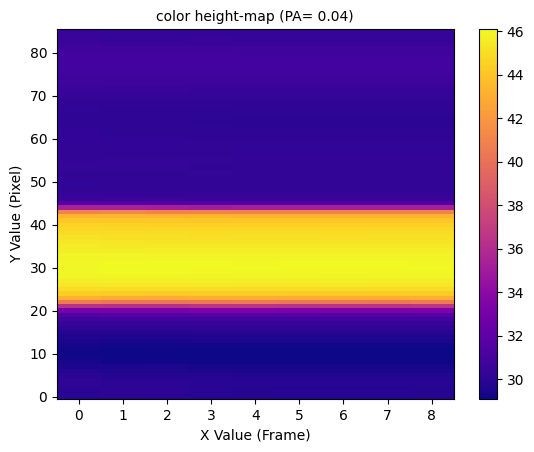

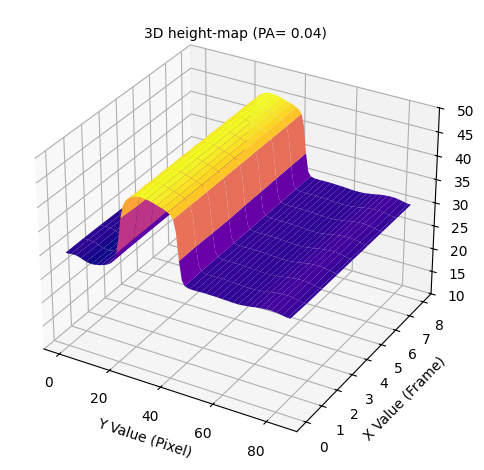

In [8]:
generate_color_map(scan[bestI],title=f"color height-map (PA= {PAval})")
generate_3d_height_map(scan[bestI],title=f"3D height-map (PA= {PAval})")
x=0

## comparison

In [9]:
control = PatternInfo(
        0, 0,
        65, 30,
        10,
        30, 4
    )

calibrated = PatternInfo(
        0.04, 0.04,
        100, 30,
        10,
        30, 4
    )


gcode = generate_pa_tune_gcode(control, False)
gcode += generate_pa_tune_gcode(calibrated)
send_gcode(PRINT_START)
send_gcode(gcode)
send_gcode("""
           LASER_OFF
           M104 S0; let the hotend cool
           M140 S0; let the bed cool 
           """)


{'jsonrpc': '2.0', 'result': 'ok', 'id': 4984605}